In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import statistics
import math
import scipy as sp

from scipy import stats, optimize, interpolate
# from scipy.optimize import curve_fit
# from scipy.special import factorial

variation01 = '1801'
path01 = 'saved_data/pummelzeugs_1/'
thom01 = np.load(path01 + variation01 + '_thom.npy')

variation02 = '1802'
path02 = 'saved_data/pummelzeugs_2/'
thom02 = np.load(path02 + variation02 + '_thom.npy')

variation45 = '18045'
path45 = 'saved_data/pummelzeugs_45/'
thom45 = np.load(path45 + variation45 + '_thom.npy')

variation60 = '18060'
path60 = 'saved_data/pummelzeugs_60/'
thom60 = np.load(path60 + variation60 + '_thom.npy')

variation90 = '18090'
path90 = 'saved_data/pummelzeugs_90/'
thom90 = np.load(path90 + variation90 + '_thom.npy')

54444
55
(0.593595109881524, 0.6105943770458271, 10.454200986510394)
56


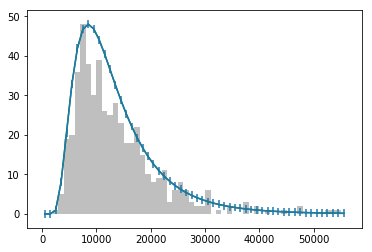

In [28]:
#INPUT:
thom = thom90
int_length = 1000

def plot_lognorm_distribution(thom, int_length):
    max = thom.max().astype(int)
    l = len(thom)

    #number of intervalls
    print(max)
    ni = (max / int_length + 1).astype(int)
    print(ni)
    count = np.zeros(ni+1)

    for entry in thom:
        c = (entry / int_length).astype(int)
        count[c] += 1
    if count.sum() != l:
        print('FEHLER!')

    fig, ax = plt.subplots()
    x = np.arange(0, max + int_length, int_length)
    y = count[(x/int_length).astype(int)]
    maxy = y.max()
    thom = (thom/int_length).astype(int)
#     print(thom)

    param=sp.stats.lognorm.fit(thom)
    print(param)
    print(len(x+int_length/2))
    xxx = np.arange(0, ni + 1)
#     print(xxx)
    pdf_fitted = sp.stats.lognorm.pdf(xxx, param[0], loc=param[1], scale=param[2])
    maxfit = pdf_fitted.max()
#     print(maxfit)
    
#     sqd = 0
#     for i in range(0, len(x+int_length/2)):
#         sqd += (y[i] - pdf_fitted[i]*maxy/maxfit)**2
#     sqd = math.sqrt(sqd/len(x+int_length/2))
#     error = np.array([sqd]*len(x+int_length/2))
    plt.bar(x+int_length/2, y, width=int_length, color='grey', alpha=0.5)
    plt.plot(x+int_length/2,pdf_fitted*maxy/maxfit,'g-')
    error = [1] * len(x+int_length/2)
    plt.errorbar(x+int_length/2, pdf_fitted*maxy/maxfit, yerr=error)
    
plot_lognorm_distribution(thom=thom90, int_length=1000)


In [ ]:
#Standardabweichung

int_length = 1000
thom = (thom90/int_length).astype(int)*int_length
# print(thom)
stabw = np.std(thom)
print(stabw)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1,1,1,1,1])

plt.errorbar(x, y, e, fmt='o')

plt.show()

<Figure size 640x480 with 1 Axes>

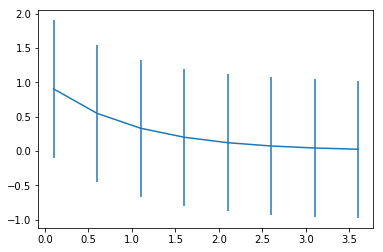

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
# example error bar values that vary with x-position
error = np.array([1]*8)


fig, ax0 = plt.subplots()
ax0.errorbar(x, y, yerr=error)

plt.show()